In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

#Question 1

(a) Summarising grades of 50 courses of student using 5 numbers - ***Dimension Reduction***(inputs- dataset and number of pca reduced dimensions, outputs-data with reduced number of dimensions)<Br>
(b) Dividing students in personality groups - ***Clustering***(inputs- scholastic and extracurricular data, hyperparameters, output- clustering(no output variable))<br>
(c) Predicting salary of student - ***Regression***(input- courses and grades, extracurriculars data, hyperparameters to the model, output - Predicted salary) <br>
(d) Predicting best type of job based on performance -***Classification***(input-hyperparameters, hobbies, skills, grades in courses etc. and output - best job profile)


#Question 3

In [ ]:
df=pd.read_csv("/content/SeoulBikeData.csv", encoding='iso-8859-1')

In [ ]:
display(df)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

The variable to be predicted(target variable) is rented bikes, which is a discrete integral quantity. Also, it's a supervised learning problem. 

RMSE and R2 score will be used here, as they are the most popular measures of performance for Regression models in ML. Other types of measures of performances such as ROC curve(clustering), F1 Score(binary classification), Daves Boulding criteria(clustering), reconstruction error(PCA- dimension reduction) are not used for regression.





In [ ]:
for cols in df:
  print(f"Number of unique values in column(/variable) {df[cols].name} are - {len(df[cols].unique())}")
#printing number of unique values in each column

Number of unique values in column(/variable) Date are - 365
Number of unique values in column(/variable) Rented Bike Count are - 2166
Number of unique values in column(/variable) Hour are - 24
Number of unique values in column(/variable) Temperature(°C) are - 546
Number of unique values in column(/variable) Humidity(%) are - 90
Number of unique values in column(/variable) Wind speed (m/s) are - 65
Number of unique values in column(/variable) Visibility (10m) are - 1789
Number of unique values in column(/variable) Dew point temperature(°C) are - 556
Number of unique values in column(/variable) Solar Radiation (MJ/m2) are - 345
Number of unique values in column(/variable) Rainfall(mm) are - 61
Number of unique values in column(/variable) Snowfall (cm) are - 51
Number of unique values in column(/variable) Seasons are - 4
Number of unique values in column(/variable) Holiday are - 2
Number of unique values in column(/variable) Functioning Day are - 2


In [ ]:
for col in df:
  print(f"{df[col].name} has {df[col].isnull().sum()} missing entries")
#loop for printing number of missing variable values

Date has 0 missing entries
Rented Bike Count has 0 missing entries
Hour has 0 missing entries
Temperature(°C) has 0 missing entries
Humidity(%) has 0 missing entries
Wind speed (m/s) has 0 missing entries
Visibility (10m) has 0 missing entries
Dew point temperature(°C) has 0 missing entries
Solar Radiation (MJ/m2) has 0 missing entries
Rainfall(mm) has 0 missing entries
Snowfall (cm) has 0 missing entries
Seasons has 0 missing entries
Holiday has 0 missing entries
Functioning Day has 0 missing entries


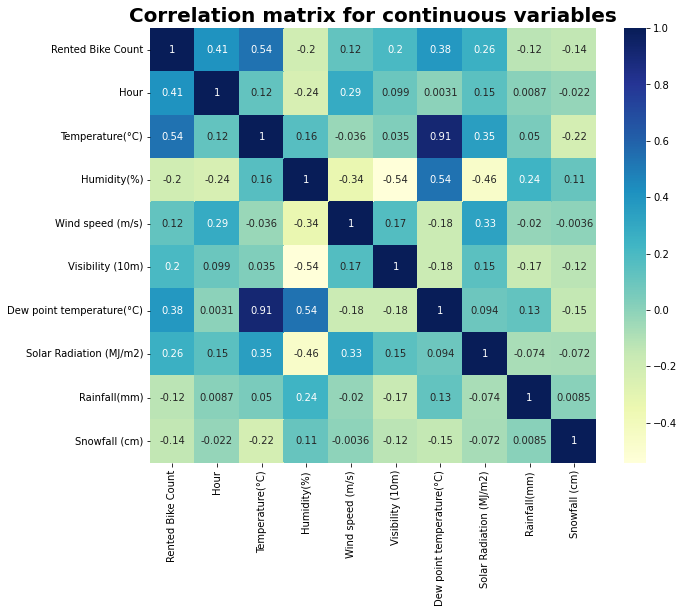

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='YlGnBu',annot=True)
plt.title('Correlation matrix for continuous variables', weight='bold', fontsize=20)
#plt.xticks(rotation=45)
plt.show()

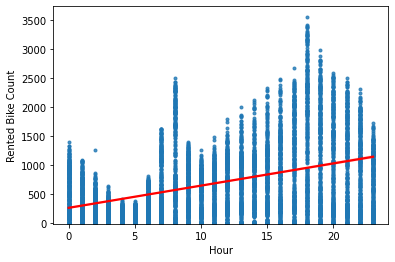

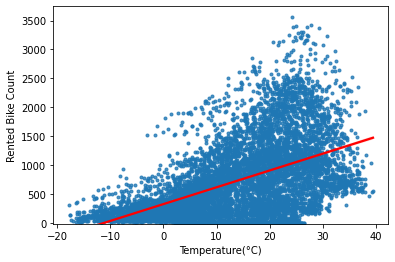

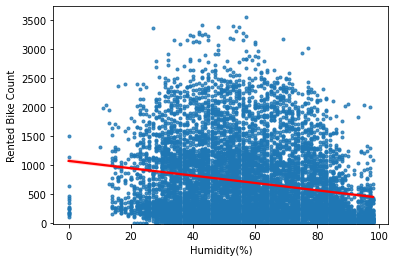

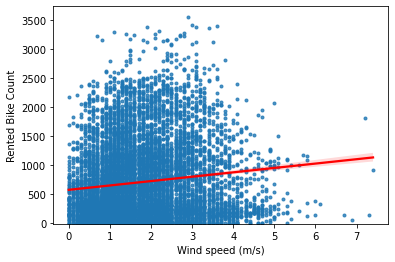

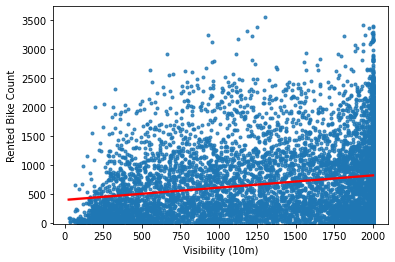

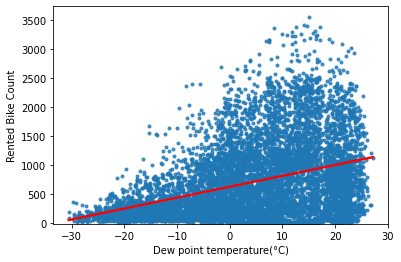

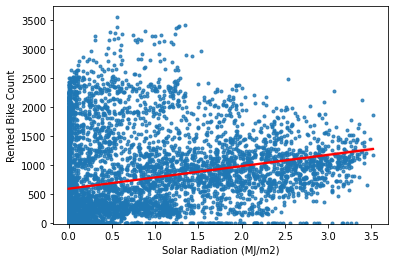

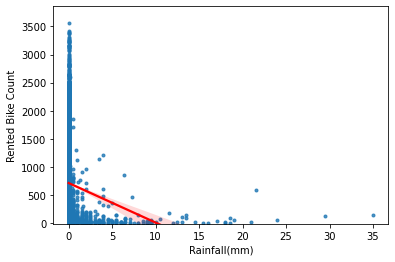

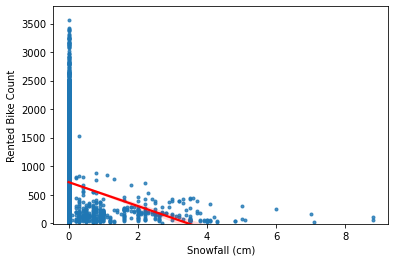

In [ ]:
listcont=['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
          'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)' ]


for cols in listcont:
   sns.regplot(x=cols, y='Rented Bike Count', data=df, marker='.', line_kws={"color": "red"});
   plt.xlabel(cols)
   plt.gca().set_ylim(bottom=-10)
   plt.show()

In [ ]:

df=df.drop(['Date','Dew point temperature(°C)', 'Functioning Day'], axis=1)
df2=df.drop(['Seasons','Holiday'], axis=1)
colz=pd.get_dummies(df['Seasons'])#converting to one hot bit
df=df.join(colz).drop('Seasons', axis=1)

#Standardising the continous variables

for col in df2.columns.values:
  a=df[col].mean()
  b=df[col].std()
  df[col] = (df[col] - a)/b
df.head()
#df is now standard normalised, could also have been done by Standard_Scaler function in statsmodel
#But this is the easiest way to standard normalise

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter
0,-0.698611,-1.661230,-1.513871,-1.042423,0.458450,0.925818,-0.655094,-0.131792,-0.171881,No Holiday,0,0,0,1
1,-0.776130,-1.516775,-1.538986,-0.993313,-0.892511,0.925818,-0.655094,-0.131792,-0.171881,No Holiday,0,0,0,1
2,-0.824192,-1.372320,-1.580845,-0.944203,-0.699516,0.925818,-0.655094,-0.131792,-0.171881,No Holiday,0,0,0,1
3,-0.926518,-1.227866,-1.597589,-0.895093,-0.796013,0.925818,-0.655094,-0.131792,-0.171881,No Holiday,0,0,0,1
4,-0.971480,-1.083411,-1.580845,-1.091533,0.554947,0.925818,-0.655094,-0.131792,-0.171881,No Holiday,0,0,0,1


Holiday is an object type feature, and we should convert it to one hot bit variable, where one represents holiday and zero represents a working day

In [ ]:
for i in range(len(df['Holiday'])):
  if df.at[i,'Holiday']=='No Holiday':
    df.at[i,'Holiday']=0
  else:
    df.at[i,'Holiday']=1


In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter
0,-0.698611,-1.661230,-1.513871,-1.042423,0.458450,0.925818,-0.655094,-0.131792,-0.171881,0,0,0,0,1
1,-0.776130,-1.516775,-1.538986,-0.993313,-0.892511,0.925818,-0.655094,-0.131792,-0.171881,0,0,0,0,1
2,-0.824192,-1.372320,-1.580845,-0.944203,-0.699516,0.925818,-0.655094,-0.131792,-0.171881,0,0,0,0,1
3,-0.926518,-1.227866,-1.597589,-0.895093,-0.796013,0.925818,-0.655094,-0.131792,-0.171881,0,0,0,0,1
4,-0.971480,-1.083411,-1.580845,-1.091533,0.554947,0.925818,-0.655094,-0.131792,-0.171881,0,0,0,0,1


For the above case, there are not many variables, so dimension reduction isn't needed here. Also, with irrelevant/redundant parameters removed, dimension reduction might veil the actual relation of a variable to the number of bikes rented. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso


In [ ]:
y=df['Rented Bike Count']
data=df.drop(['Rented Bike Count'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.15)

In [ ]:
lasso_par = {'alpha' : [0.00001, 0.0001, 0.001, 0.01,0.1,1,10,100]}
Forest_par = {'n_estimators' : [10,50,100], 'bootstrap':[True, False],'criterion':['mse'] }


Random Forest Regressor

In [ ]:
RF = GridSearchCV(RandomForestRegressor(), Forest_par, scoring='neg_mean_squared_error',cv=5) #cv here is the cross validation
RF.fit(x_train, y_train)
RF.best_score_

-0.21726405925277414

In [ ]:
RF.best_params_

{'bootstrap': True, 'criterion': 'mse', 'n_estimators': 50}

In [ ]:
y_pred_rf=RF.predict(x_test)
r2_RF=r2_score(y_pred_rf, y_test)
r2_RF

0.7447106658201332

RF Manual Hyper parameter tuning

In [ ]:
rfr = RandomForestRegressor(n_estimators=50).fit(x_train,y_train)
print(rfr.score(x_train,y_train))
print(rfr.score(x_test, y_test))

0.9695055813227853
0.7906404665136585


In [ ]:
yp=rfr.predict(x_test)
print(r2_score(y_test, yp))

0.7906404665136585


SVM Regression

In [ ]:
parameters = {'kernel': ['rbf'], 'C':[1.5, 10],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}# for svm regression
from sklearn import svm

In [ ]:
svr = svm.SVR()                #SVM Regressor
clf = GridSearchCV(svr, parameters, n_jobs=-1)
clf.fit(x_train,y_train)
clf.best_params_

{'C': 1.5, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
y_pred_svr=clf.predict(x_test)
r2_SVR=r2_score(y_test, y_pred_svr)
r2_SVR

0.7541668807926409

In [ ]:
clf.best_score_

0.7417096396628174

Lasso Regression

In [ ]:
lasso=GridSearchCV(Lasso(), lasso_par, scoring='neg_mean_squared_error',cv=5, n_jobs=-1)
lasso.fit(x_train, y_train)
lasso.best_score_

-0.5143273072067187

In [ ]:
lasso.best_params_

{'alpha': 0.0001}

In [ ]:
y_pred_lasso=lasso.predict(x_test)
r2_lasso=r2_score(y_test, y_pred_lasso)
r2_lasso

0.4794396380991518

Creating a scorecard for models

In [ ]:
rmse=np.sqrt([mean_squared_error(y_test,y_pred_rf), mean_squared_error(y_test,yp), mean_squared_error(y_test,y_pred_svr), mean_squared_error(y_test,y_pred_lasso)])

In [ ]:
scores_of_models={'Model':['Random Forest Regressor', 'RF Manual Hyperpar Tuning', 'SVM Regressor', 'Lasso Regressor'], 'R2 Score':[r2_RF, r2_score(y_test, yp), r2_SVR, r2_lasso], 'RMSE':rmse}

In [ ]:
score_compare=pd.DataFrame(scores_of_models)

In [ ]:
score_compare

,Model,R2 Score,RMSE
0,Random Forest Regressor,0.744711,0.450608
1,RF Manual Hyperpar Tuning,0.790640,0.454131
2,SVM Regressor,0.754167,0.492102
3,Lasso Regressor,0.479440,0.716095


In [ ]:
score_compare.sort_values(by='R2 Score', ascending=False,ignore_index=True)

,Model,R2 Score,RMSE
0,RF Manual Hyperpar Tuning,0.790640,0.454131
1,SVM Regressor,0.754167,0.492102
2,Random Forest Regressor,0.744711,0.450608
3,Lasso Regressor,0.479440,0.716095


We see that Random forest regressor gives the best results, followed by SVM regressor and Lasso regression. This happens because by the nature of the models, Lasso Regressoin works best with small number of data records and large number of features. On the other hand, SVM R and RF work well with large datasets.

#Question 4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score,mean_squared_error, f1_score
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

In [ ]:
csv0data=pd.read_csv('/content/0.csv', header=None)
csv1data=pd.read_csv('/content/1.csv', header=None)
csv2data=pd.read_csv('/content/2.csv', header=None)
csv3data=pd.read_csv('/content/3.csv', header=None)
dfm=pd.concat([csv0data, csv1data, csv2data, csv3data])

dfm=dfm.reset_index()
dfm=dfm.drop(['index'],axis=1)

print("\n")
display(dfm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11673,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,2.0,5.0,-10.0,-17.0,-3.0,-2.0,12.0,2.0,2.0,2.0,-4.0,-28.0,1.0,-6.0,-5.0,-1.0,1.0,0.0,11.0,9.0,-4.0,14.0,2.0,-2.0,-2.0,-8.0,-17.0,1.0,-2.0,6.0,-14.0,-3.0,-4.0,-2.0,27.0,18.0,-6.0,-17.0,-4.0,1.0,-2.0,1.0,13.0,-12.0,-3.0,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11674,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,9.0,7.0,5.0,50.0,31.0,18.0,-3.0,-3.0,1.0,-2.0,17.0,-6.0,-10.0,-18.0,-11.0,-5.0,-2.0,-2.0,10.0,21.0,-2.0,15.0,5.0,-2.0,-2.0,-6.0,-6.0,-50.0,-16.0,7.0,-12.0,-2.0,-3.0,1.0,21.0,48.0,12.0,-12.0,-1.0,3.0,2.0,5.0,-12.0,-8.0,5.0,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11675,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,4.0,0.0,-3.0,33.0,-2.0,-1.0,-1.0,2.0,-3.0,0.0,-38.0,-25.0,0.0,3.0,2.0,-1.0,0.0,-3.0,14.0,0.0,-1.0,-3.0,-3.0,-4.0,-3.0,-6.0,-2.0,13.0,-5.0,-19.0,-6.0,-5.0,-4.0,1.0,41.0,-10.0,-4.0,-9.0,3.0,3.0,2.0,3.0,1.0,50.0,12.0,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11676,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,-1.0,-1.0,-5.0,12.0,1.0,-19.0,0.0,-4.0,-4.0,0.0,25.0,0.0,3.0,-5.0,1.0,1.0,-2.0,-4.0,-31.0,-17.0,-7.0,5.0,3.0,-5.0,-3.0,-1.0,4.0,-48.0,-13.0,-5.0,-14.0,6.0,5.0,6.0,-3.0,79.0,15.0,-6.0,-3.0,-1.0,-3.0,-1.0,-1.0,27.0,-2.0,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


In [ ]:
for cols in dfm:
  print(f"Number of unique values in column(/variable) {dfm[cols].name} are - {len(dfm[cols].unique())}")
#printing number of unique values in each column

Number of unique values in column(/variable) 0 are - 191
Number of unique values in column(/variable) 1 are - 154
Number of unique values in column(/variable) 2 are - 61
Number of unique values in column(/variable) 3 are - 102
Number of unique values in column(/variable) 4 are - 161
Number of unique values in column(/variable) 5 are - 213
Number of unique values in column(/variable) 6 are - 246
Number of unique values in column(/variable) 7 are - 177
Number of unique values in column(/variable) 8 are - 184
Number of unique values in column(/variable) 9 are - 149
Number of unique values in column(/variable) 10 are - 62
Number of unique values in column(/variable) 11 are - 97
Number of unique values in column(/variable) 12 are - 159
Number of unique values in column(/variable) 13 are - 211
Number of unique values in column(/variable) 14 are - 245
Number of unique values in column(/variable) 15 are - 176
Number of unique values in column(/variable) 16 are - 187
Number of unique values in 

In [ ]:
for cols in dfm:
  n=dfm[cols].isnull().sum()
  print(f"number of missing entries in column {cols} is {n}")

number of missing entries in column 0 is 0
number of missing entries in column 1 is 0
number of missing entries in column 2 is 0
number of missing entries in column 3 is 0
number of missing entries in column 4 is 0
number of missing entries in column 5 is 0
number of missing entries in column 6 is 0
number of missing entries in column 7 is 0
number of missing entries in column 8 is 0
number of missing entries in column 9 is 0
number of missing entries in column 10 is 0
number of missing entries in column 11 is 0
number of missing entries in column 12 is 0
number of missing entries in column 13 is 0
number of missing entries in column 14 is 0
number of missing entries in column 15 is 0
number of missing entries in column 16 is 0
number of missing entries in column 17 is 0
number of missing entries in column 18 is 0
number of missing entries in column 19 is 0
number of missing entries in column 20 is 0
number of missing entries in column 21 is 0
number of missing entries in column 22 is 

[]

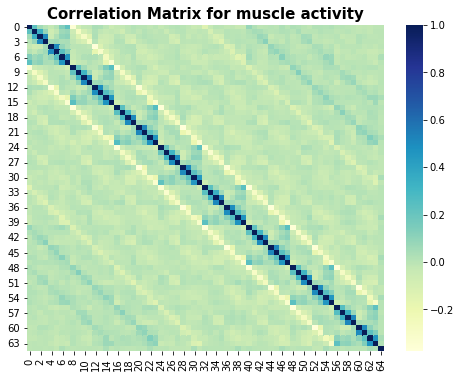

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data=dfm.corr(), cmap='YlGnBu',annot=False)
plt.title('Correlation Matrix for muscle activity', weight='bold', fontsize=15)
plt.yticks(rotation=0)
plt.plot()

We see that there is no significant correlation among any of the columns(as no continuous dark spots are observed, except centreline).

Hence, we won't be discarding any column due to redundant representation. 

In [ ]:
for col in x.columns.values:
  a=x[col].mean()
  b=x[col].std()
  x[col] = (x[col] - a)/b
print(x)  #normalising data

             0         1         2   ...        61        62        63
0      1.428383  0.401707  1.150129  ... -0.259292 -2.278357  1.069478
1     -2.503385 -0.448136 -0.853901  ...  0.836552  4.451721  1.005087
2     -0.995309 -0.618105 -1.455110  ...  0.836552  4.570487  3.129994
3      0.135747  0.316723  0.148114  ...  1.541023  4.768431  2.808038
4      0.351187  0.061770  0.148114  ... -0.924626 -4.376558 -4.403767
...         ...       ...       ...  ...       ...       ...       ...
11673 -0.133552 -0.023215 -0.052289  ... -1.903058  0.255320 -0.540300
11674 -0.672150 -0.363152 -0.653498  ... -1.746509 -0.417688 -0.926647
11675 -0.025832 -0.193183 -0.052289  ... -1.120312 -0.140567  0.039220
11676  0.081887  0.401707  0.949726  ... -3.507687  0.176142  0.361176
11677 -0.079692  0.401707  0.548920  ...  2.519455  0.492852  0.361176

[11678 rows x 64 columns]


In [ ]:
y=dfm[64]
x=dfm.drop([64], axis=1)

In [ ]:
pcam=PCA(n_components=15)


In [ ]:
pcam.fit(x)
xtrans=pcam.transform(x)

In [ ]:
dft=pd.DataFrame(xtrans)
dft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-47.499476,-56.968842,-27.876436,-11.391188,116.617879,-48.055179,88.633470,6.710942,-70.779528,-32.171444,-5.900698,-91.693999,55.295041,37.943910,19.182300
1,-127.908797,-130.074167,-12.038839,7.043793,51.942331,-116.562210,15.894981,-68.802522,49.859065,5.545398,-14.127593,40.136125,-8.679836,-26.303883,24.245803
2,-65.916350,0.750632,161.222208,17.389378,-90.923636,-92.553692,-36.111952,70.237514,157.563295,-16.539052,9.991930,8.765676,9.602421,-10.163524,47.142672
3,-82.764839,-48.187656,33.913078,-59.646724,-57.319547,-99.734960,-103.003755,-75.750067,50.442192,37.780440,42.973331,17.847231,-54.363390,-25.717012,20.199342
4,108.172142,114.759604,-57.268904,76.272155,-7.684552,145.019272,-6.919046,58.009484,-49.747483,26.967616,10.682984,44.916843,36.316581,60.346576,16.400402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11673,-8.308415,39.419148,-18.208956,28.551529,0.413225,-11.732320,35.665561,-12.598082,3.428676,27.149308,-20.910256,-19.106082,-28.980789,-15.076349,-6.264355
11674,11.824639,46.884116,55.915886,-10.966927,-42.286538,13.374851,60.329570,-0.733169,-21.426815,19.850265,0.242263,1.498718,-14.116739,-19.123703,-20.122697
11675,29.677732,53.037856,-36.854844,-13.061737,-9.246436,-20.262472,-3.900588,-31.846092,13.868413,24.003704,-3.322573,-28.020015,2.854759,14.891905,-22.956410
11676,-27.826088,46.888678,-14.289290,-17.815275,-48.670322,-30.457483,67.985314,20.002311,-0.750895,63.669056,-35.848378,-0.045867,-13.196943,-12.284801,-9.479824


I would be implementing the Multilayer Perceptron model, the Random Forest Classifier and the SVM Classifier in this analysis.

In [ ]:
RFm_par = {'n_estimators' : [5,10,15, 20,30]}
SVMm_par = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001,], 'kernel': ['rbf']} 
MLPm_nn_par = {'hidden_layer_sizes' : [(2,), (4,), (5,),(10,)], 'alpha' : [0.001, 0.1, 1]}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dft, y, test_size=0.15)

In [ ]:
RFm = GridSearchCV(RandomForestClassifier(), RFm_par, scoring='neg_mean_squared_error',cv=5) 
#cv here is the cross validation
RFm.fit(x_train, y_train)
RFm.best_score_

-0.8258099898280407

In [ ]:
RFm.best_params_

{'n_estimators': 30}

In [ ]:
y_pred=RFm.predict(x_test)

In [ ]:
f1_rf_m= (f1_score(y_test, y_pred,average='weighted'))
f1_rf_m

0.6075680768663995

In [ ]:
accuracy_rf=accuracy_score(y_test, y_pred)
accuracy_rf

0.6095890410958904

In [ ]:
scores_m=pd.DataFrame(columns=['Model', 'F1 Score', 'Accuracy'])

In [ ]:
scores_m=scores_m.append({'Model':'Random Forest', 'F1 Score':f1_rf_m, 'Accuracy':accuracy_rf}, ignore_index=True)

Multilayer Perceptron NN 

In [ ]:
mlp=GridSearchCV(MLPClassifier(max_iter=100), MLPm_nn_par, scoring='accuracy', cv=5)
mlp.fit(x_train, y_train)


In [ ]:
mlp.best_score_

0.6050784712128475

In [ ]:
mlp.best_params_

{'alpha': 1, 'hidden_layer_sizes': (10,)}

In [ ]:
y_pred_mlpc_m=mlp.predict(x_test)

In [ ]:
f1score = (f1_score(y_test, y_pred_mlpc_m,average='weighted'))
accuracy= (mlp.score(x_test, y_test))
scores_m=scores_m.append({'Model':'MLPC', 'F1 Score':f1score, 'Accuracy':accuracy}, ignore_index=True)
scores_m

,Model,F1 Score,Accuracy
0,Random Forest,0.607568,0.609589
1,MLPC,0.622804,0.632420


SVM Classification

In [ ]:
param_grid = { 'criterion' : ['gini', 'entropy'],
              "max_features": np.arange(1, 9),
              "min_samples_leaf": np.arange(1, 9),
    'max_depth' : [2,4,6,8,10,12]}


In [ ]:
from sklearn.svm import SVC

In [ ]:
grid = GridSearchCV(SVC(), SVMm_par,scoring='accuracy', cv=5, n_jobs=-1) 
grid.fit(x_train,y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid.best_params_


{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_pred=grid.predict(x_test)
accuracy_svm=grid.score(x_test, y_test)
accuracy_svm

0.5296803652968036

In [ ]:
f1_score_svm=f1_score(y_test, svm_pred, average='weighted')
f1_score_svm

0.5001407882064995

In [ ]:
scores_m=scores_m.append({'Model':'SVC', 'F1 Score':f1_score_svm, 'Accuracy':accuracy_svm}, ignore_index=True)

In [ ]:
scores_m

,Model,F1 Score,Accuracy
0,Random Forest,0.607568,0.609589
1,MLPC,0.622804,0.632420
2,SVC,0.500141,0.529680


We see that the Accuracy is highest with MLPC model, and the least with SVC model. Given that PCA has been used to significantly reduce the component number from 64 to 15, and still we get an accuracy of 62%, is a very remarkable result of the model. 

#Question 5

In [ ]:
n=np.linalg.norm(x,ord=2,axis=1)
stddev=n.std()
print(stddev)

50.94542928609859


In [ ]:
list_error=[]
for i in range(64):                 #looping over different pca dimensions
  pcatest=PCA(n_components=i+1)
  xtransform=pcatest.fit_transform(x)
  x_inv_transform=pcatest.inverse_transform(xtransform)
  mse = np.sqrt(mean_squared_error(x_inv_transform,x))
  nmse=mse/stddev*100 #as we need a percentage 
  list_error.append(nmse)

In [ ]:
list_error

[32.83538981620075,
 31.57086720164621,
 30.43270777533667,
 29.366944704562346,
 28.298817193260817,
 27.313847849813005,
 26.317890682148086,
 25.31562192085578,
 24.39730102809139,
 23.66153648336559,
 22.926301288183176,
 22.183386211516947,
 21.446413822323574,
 20.722854497413472,
 20.028773810334112,
 19.32384721127198,
 18.769470817385596,
 18.22018058578894,
 17.672979543013156,
 17.164155862827812,
 16.6591922764196,
 16.171733139743175,
 15.674099305885644,
 15.191744235691711,
 14.707573872205668,
 14.254715615513286,
 13.809771968751267,
 13.33726306286277,
 12.87216443936815,
 12.401355924166287,
 11.981912573349174,
 11.56190542286732,
 11.158149258954273,
 10.740884304166745,
 10.311971283540052,
 9.884571649403666,
 9.47072405456652,
 9.049151298289688,
 8.616088588286594,
 8.18526601243297,
 7.748047784920971,
 7.398058693732211,
 7.046375914975892,
 6.6925890289641,
 6.3378562949590975,
 5.969213442910221,
 5.599387487532481,
 5.24052632521464,
 4.871328919363643,
 4

In [ ]:
for i in range(64):           #finding the minimum index where error<1%
  if list_error[i]<1:
    count=i+1
    break

In [ ]:
print(f"Least number of components for PCA resonstruction RMSE to be less than 1% std_dev is {count}")

Least number of components for PCA resonstruction RMSE to be less than 1% std_dev is 62


[]

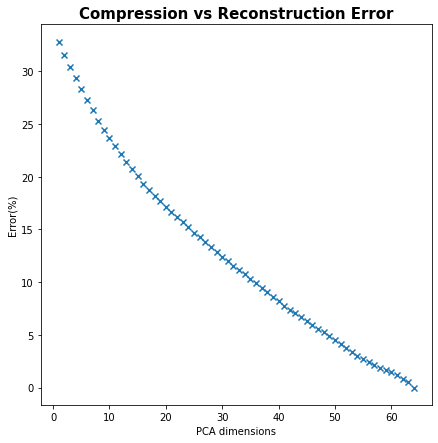

In [ ]:
fig=plt.figure(figsize=(7,7))
indice_list=np.arange(64)
indice_list=indice_list+1
plt.title('Compression vs Reconstruction Error', fontsize=15, weight='bold')
plt.xlabel('PCA dimensions')
plt.ylabel('Error(%)')
plt.scatter(x=indice_list, y=list_error, marker='x')
plt.plot()

We notice that the error decreases gradually as the PCA dimensions increase.